In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Detecting edges

In [2]:
%pylab inline
import cv2

Populating the interactive namespace from numpy and matplotlib


## Loading, converting to grayscale and displaying the images

In [3]:
img = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
print("grayscale image: {1}px x {0}px".format(height, width))

grayscale image: 259px x 194px


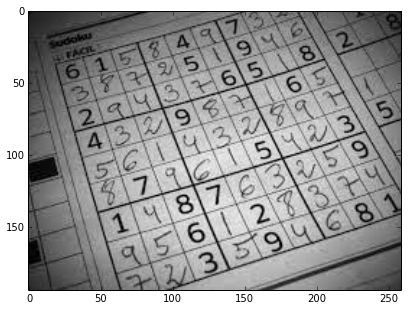

In [4]:
figure(figsize(7.5,5))
plt.imshow(img, 'gray');

## Edge detection

### Sobel operator

In [5]:
k = 3
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=k)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=k)

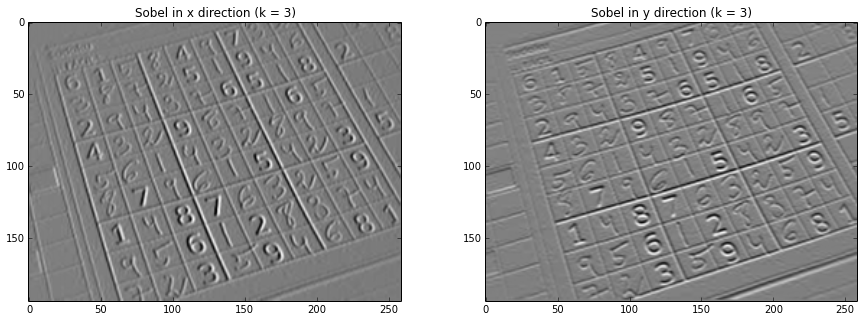

In [6]:
figure(figsize(15,5))
plt.subplot(1, 2, 1), plt.imshow(sobelx, 'gray')
plt.title('Sobel in x direction (k = {0})'.format(k))
plt.subplot(1, 2, 2), plt.imshow(sobely, 'gray')
plt.title('Sobel in y direction (k = {0})'.format(k));

In [7]:
min(img.flatten()), max(img.flatten()), min(sobelx.flatten()), max(sobelx.flatten())

(0, 204, -707.0, 741.0)

In [8]:
sobel = np.sqrt(sobelx**2 + sobely**2)
sobel_min = np.min(sobel.flatten())
sobel_max = np.max(sobel.flatten())
sobel_min, sobel_max

(0.0, 756.66901614906897)

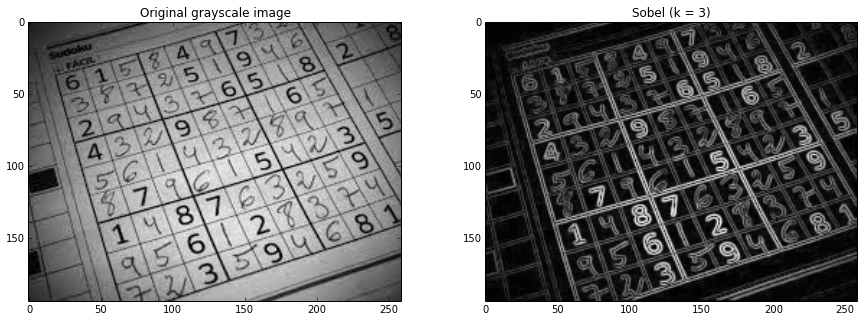

In [9]:
figure(figsize(15,5))
plt.subplot(1, 2, 1), plt.imshow(img, 'gray')
plt.title('Original grayscale image')
plt.subplot(1, 2, 2), plt.imshow(sobel, 'gray')
plt.title('Sobel (k = {0})'.format(k));

In [10]:
sobel2 = np.uint8((sobel - sobel_min) * 255.0 / (sobel_max - sobel_min))
theta, edges_sobel = cv2.threshold(sobel2, 50, 255, cv2.THRESH_BINARY)

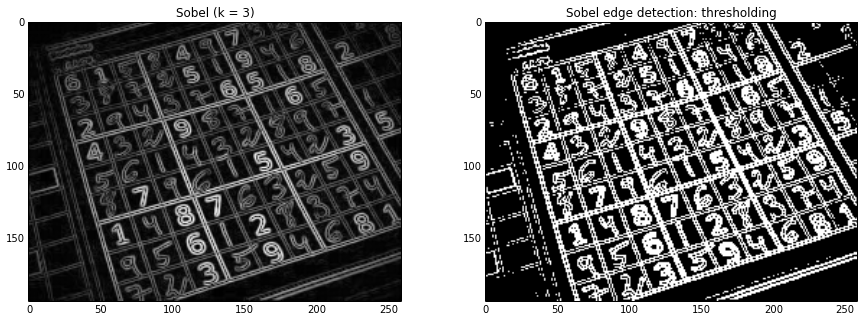

In [11]:
figure(figsize(15,5))
plt.subplot(1, 2, 1), plt.imshow(sobel, 'gray')
plt.title('Sobel (k = {0})'.format(k));
plt.subplot(1, 2, 2), plt.imshow(edges_sobel, 'gray')
plt.title('Sobel edge detection: thresholding');

### Laplace operator

In [12]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

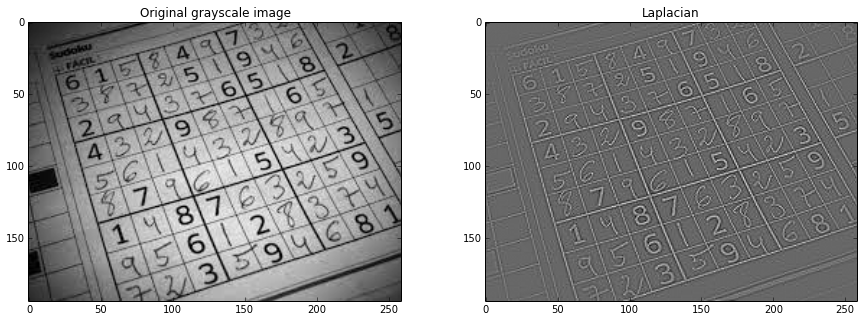

In [13]:
figure(figsize(15,5))
plt.subplot(1, 2, 1), plt.imshow(img, 'gray')
plt.title('Original grayscale image')
plt.subplot(1, 2, 2), plt.imshow(laplacian, 'gray')
plt.title('Laplacian');

In [14]:
np.min(laplacian.flatten()), np.max(laplacian.flatten())

(-321.0, 471.0)

### Canny Edge Detector

In [15]:
canny = cv2.Canny(img, 100, 200)

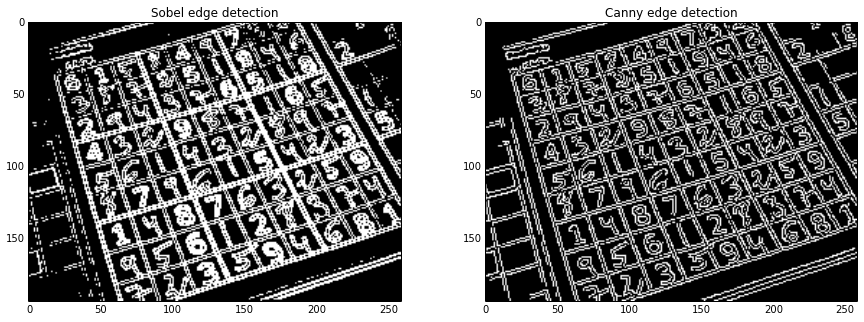

In [16]:
figure(figsize(15,5))
plt.subplot(1, 2, 1), plt.imshow(edges_sobel, 'gray')
plt.title('Sobel edge detection')
plt.subplot(1, 2, 2), plt.imshow(canny, 'gray')
plt.title('Canny edge detection');

## Handling negative numbers

In [17]:
img2 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)

# Output dtype = cv2.CV_8U
sobel1_8u = cv2.Sobel(img2, cv2.CV_8U, 1, 0, ksize=k)

# Output dtype = cv2.CV_64F.  
sobel2_64f = cv2.Sobel(img2, cv2.CV_64F, 1, 0, ksize=k)

# compute the absolute values
sobel2_abs = np.absolute(sobel2_64f) 

# map the values to the range 0..255 and convert them to cv2.CV_8U
hmin = min(sobel2_abs.flatten())
hmax = max(sobel2_abs.flatten())
sobel2_8u = np.uint8(255 * (sobel2_abs - hmin) / (hmax - hmin))

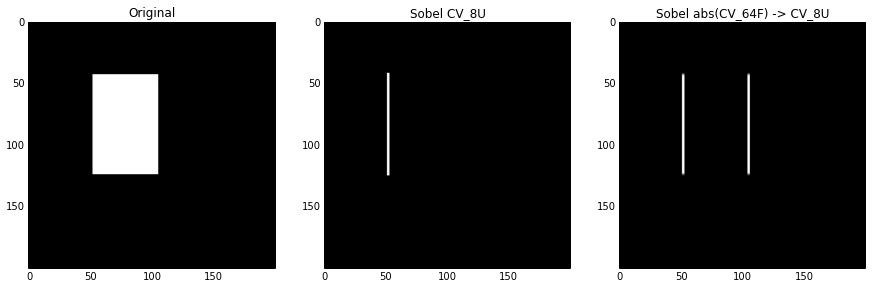

In [18]:
figure(figsize(15,5))
plt.subplot(1, 3, 1), plt.imshow(img2, cmap = 'gray')
plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(sobel1_8u, 'gray')
plt.title('Sobel CV_8U')
plt.subplot(1, 3, 3), plt.imshow(sobel2_8u, 'gray')
plt.title('Sobel abs(CV_64F) -> CV_8U');

Gray value range of the original image

In [19]:
min(img2.flatten()), max(img2.flatten())

(0, 255)

Gray value range of the Sobel filtered image using UINT8 (unsigned byte) for all computations

In [20]:
min(sobel1_8u.flatten()), max(sobel1_8u.flatten())

(0, 255)

Gray value range of the Sobel filtered image using 64F (double)

In [21]:
min(sobel2_64f.flatten()), max(sobel2_64f.flatten())

(-1020.0, 1020.0)

Gray value range of the Sobel filtered image using 64F (double) after conversion to UINT8 (unsigned byte)

In [22]:
min(sobel2_8u.flatten()), max(sobel2_8u.flatten())

(0, 255)